# Thermal Reactivation

In [1]:
import PFAS_SAT_ProcessModels as pspd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)

## Model document
The thermal reactivation of GAC uses the same thermal treatment model, except it calculates the PFAS remaining in the reactivated GAC instead of an ash residual stream.

<img src="../Images/ProcessModels/ThemalTreatment.png" alt="Drawing" style="width: 500px;"/>

### Assumptions and Limitations
1.	The model assumes a single DRE and fraction remaining on the residual for each material and type of PFAS. Data is relatively limited, but this can be readily updated as more data becomes available. 
2.	The model does not consider transformations of PFAS. 



## Input Parameters for Thermal Reactivation model

In [2]:
ThermalReactivation = pspd.ThermalReactivation()
ThermalReactivation.InputData.Data[['Category','Dictonary_Name','Parameter Name', 'Parameter Description', 'amount', 'unit','Reference']]

,Category,Dictonary_Name,Parameter Name,Parameter Description,amount,unit,Reference
0,Total destruction and removal efficiency,DRE,PFOA,DRE of PFOA,0.97,fraction,
1,Total destruction and removal efficiency,DRE,PFOS,DRE of PFOS,0.97,fraction,
2,Total destruction and removal efficiency,DRE,PFBA,DRE of PFBA,0.97,fraction,
3,Total destruction and removal efficiency,DRE,PFPeA,DRE of PFPeA,0.97,fraction,
4,Total destruction and removal efficiency,DRE,PFHxA,DRE of PFHxA,0.90,fraction,
5,Total destruction and removal efficiency,DRE,PFHpA,DRE of PFHpA,0.97,fraction,
6,Total destruction and removal efficiency,DRE,PFNA,DRE of PFNA,0.97,fraction,
7,Total destruction and removal efficiency,DRE,PFDA,DRE of PFDA,0.97,fraction,
8,Total destruction and removal efficiency,DRE,PFBS,DRE of PFBS,0.98,fraction,
9,Total destruction and removal efficiency,DRE,PFHxS,DRE of PFHxS,0.99,fraction,


## Incoming Spent GAC to Thermal Reactivation 

In [3]:
IncominWaste = pspd.IncomFlow()
IncominWaste.set_flow('Spent GAC', 1000)
IncominWaste.calc()
SpentGAC = IncominWaste.Inc_flow
SpentGAC.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,900.0
2,Moisture flow,kg,100.0
3,VS flow,kg,829.8
4,Carbon flow,kg,630.0
5,PFOA,μg,900000.0
6,PFOS,μg,1500000.0
7,PFBA,μg,0.0
8,PFPeA,μg,0.0
9,PFHxA,μg,0.0


## PFAS balance in Thermal Reactivation

In [4]:
ThermalReactivation.calc(Inc_flow=SpentGAC)
ThermalReactivation.report(normalized=True)

,Air Emission,Reactivated GAC,Destructed
PFOA,2.01,0.99,97.0
PFOS,2.01,0.99,97.0
PFBA,NaN,NaN,NaN
PFPeA,NaN,NaN,NaN
PFHxA,NaN,NaN,NaN
PFHpA,NaN,NaN,NaN
PFNA,NaN,NaN,NaN
PFDA,NaN,NaN,NaN
PFBS,NaN,NaN,NaN
PFHxS,NaN,NaN,NaN


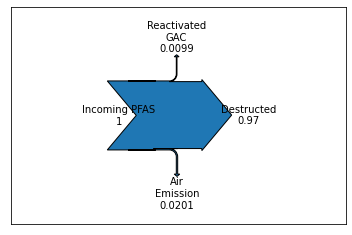

In [5]:
ThermalReactivation.plot_sankey()

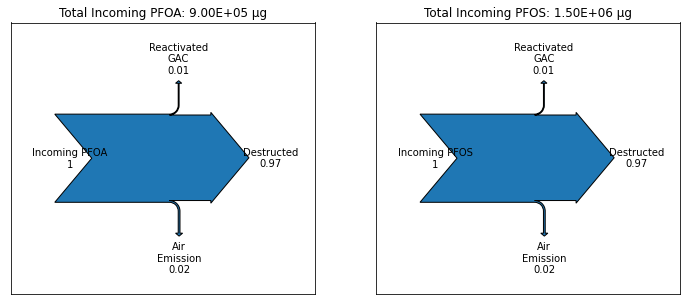

In [6]:
ThermalReactivation.plot_sankey_report(margin=.5, gap=.3)